<a href="https://colab.research.google.com/github/Lovejeet-Singh-31/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Problem Statement:**
**In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.**
### **Data Description -**
* **Battery_power** - Total energy a battery can store in one time measured in mAh
* **Blue** - Has bluetooth or not
* ***Clock_speed*** - speed at which microprocessor executes instructions
* ***Dual_sim*** - Has dual sim support or not
* ***Fc*** - Front Camera mega pixels
* ***Four_g*** - Has 4G or not
* ***Int_memory*** - Internal Memory in Gigabytes
* ***M_dep*** - Mobile Depth in cm
* ***Mobile_wt*** - Weight of mobile phone
* ***N_cores*** - Number of cores of processor
* ***Pc*** - Primary Camera mega pixels
* ***Px_height*** - Pixel Resolution Height
* ***Px_width*** - Pixel Resolution Width
* ***Ram*** - Random Access Memory in Mega Bytes
* ***Sc_h*** - Screen Height of mobile in cm
* ***Sc_w*** - Screen Width of mobile in cm
* ***Talk_time*** - longest time that a single battery charge will last when you are
* ***Three_g*** - Has 3G or not
* ***Touch_screen*** - Has touch screen or not
* ***Wifi*** - Has wifi or not
* ***Price_range*** - This is the target variable with value of 
* 0(low cost), 
* 1(medium cost),
* 2(high cost) and
* 3(very high cost).


#Our target variable has 4 categories so basically it is a Multiclass classification problem.

#**Following are the 7 major steps of building Machine Learning Model** :
#1.   Collecting Data.
#2.   Preparing the Data
*   Exploratory Data Analysis.
*   feature engineering.


#3.   Choosing a Model
#4.   Training the Model.
#5.   Evaluating the Model.
#6.   Parameter Tuning.
#7.   Making Predictions.

#First thing first importing the necessary libraries for EDA and Machine learning algorithim to train our model. 
##Following are the libraries:-

1.   NumPy
2.   Pandas
3.   Matplotlib
4.   Seaborn
5.   Scikit Learn




## Libraries

In [1]:
# Libraries For Exploratory Data Analysis
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt

# Sklearn Libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

#importing all essential Algorithm For Our Project
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


#Evaluation Metrics For Classification
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix,confusion_matrix,roc_curve,roc_auc_score,auc

#importing Optimal Algorithm Search Tool 
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

##Now we are ready to mount the google drive using following code

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**1.Collecting Data.**

#After mounting the gdrive we are ready to load our dataset.
we have mobile price range data.In which we have diffrent observations which give us some intuition about different mobile component effect the price range.


In [3]:
#loading our Dataset
mobile_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mobile Price Range Prediction - Lovejeet Singh/data_mobile_price_range.csv')

#**2.Preparing the Data**

##Now checking the shape of our DataFrames which helps to get an idea to know the number of rows and columns present in our both DataFrames.

In [4]:
#Checking the Number of rows and columns using Shape methods
mobile_df.shape

(2000, 21)

#We have 2000 observations/Rows and 21 Features.

#Getting a glimps of our dataset using Head Function. 

In [5]:
mobile_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


#Using info() method we can easily get the idea of what kind of data type and null values inside our both dataframes we have.

In [6]:
#checking the info 
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#As we can see that the intire dataset holds only numeric values.

In [7]:
#calculating totall null values in our store dataframe
mobile_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#as we can see that in our Mobile_df we have zero null values. Which means the data was well maintained.

#Checking the Duplicate Values in our final dataset.

In [8]:
# Checking Duplicate Values
value=len(mobile_df[mobile_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


#We have zero Duplicated values.

##Now we can see the numeric value and its aggregations like mean,mode,max and median using Describe method

In [9]:
pd.set_option('display.max_columns', None)

In [10]:
#checking the mean mode and median in rossman_df dataset using describe function
mobile_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


*  # Px_height - Pixel Resolution Height feature has minimum vakue zero which is not posible 
*  # Sc_w - Screen Width of mobile in cm feature has also minimum value zero.

#One Way
##In both the feature we have to replace 0 or missing information by checking its distribution then according to the the chart we have will decide how to fill these zero values with mean, mode and median. 

#Other Way
##Using KNNImputer we are able to inpute the 0 value to its neighbours value



In [11]:
# Checking How many observations having screen width and px_height value as 0.
print(mobile_df[mobile_df['sc_w']==0].shape[0])
print(mobile_df[mobile_df['px_height']==0].shape[0])

180
2


#As we can see that screen Width has 180 observations has zero values. so we have to convert 0 to np.nan value for our KNNImputer.
#In px_height we can drop those observation which has value as 0. 

In [12]:
# As there are only 2 observations having px_height=0. so we will drop it.
mobile_df=mobile_df[mobile_df['px_height']!=0]

In [13]:
# Replacing 0 with NAN so that we can implement KNN Imputer.
mobile_df['sc_w']=mobile_df['sc_w'].replace(0,np.nan)

#Applying KNNImputer on our dataset it will replace the NAN values by its Nearest Neighbours.

In [14]:
# import KNN imputer frio sklearn
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=1)
mobile_df=pd.DataFrame(impute_knn.fit_transform(mobile_df),columns=mobile_df.columns)

In [15]:
# Checking shape
mobile_df.shape

(1998, 21)

#So now we have 1998 number of Rows and 21 number of Features/Columns.

#**Exploratory Data Analysis**

In [16]:
#checking the first 5 rows of our dataframe
mobile_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0,19.0,0.0,0.0,1.0,1.0
1,1021.0,1.0,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.0,6.0,905.0,1988.0,2631.0,17.0,3.0,7.0,1.0,1.0,0.0,2.0
2,563.0,1.0,0.5,1.0,2.0,1.0,41.0,0.9,145.0,5.0,6.0,1263.0,1716.0,2603.0,11.0,2.0,9.0,1.0,1.0,0.0,2.0
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,9.0,1216.0,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,0.0,2.0
4,1821.0,1.0,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.0,14.0,1208.0,1212.0,1411.0,8.0,2.0,15.0,1.0,1.0,0.0,1.0


#First we have to check our target feature is class balanced or unbalanced.

In [33]:
# lets have look at our target variable's counts
price_range_counts=mobile_df['price_range'].value_counts()
price_range_counts

2.0    500
0.0    500
1.0    499
3.0    499
Name: price_range, dtype: int64

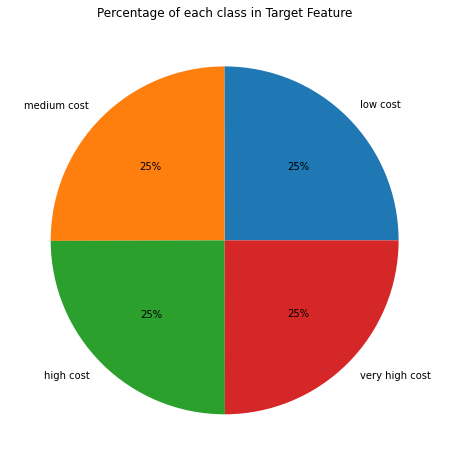

In [47]:
labels = ["low cost", "medium cost", "high cost", "very high cost"]
fig,ax=plt.subplots(figsize=(15,8))
plt.pie(price_range_counts, labels=labels, autopct='%.0f%%')
plt.title('Percentage of each class in Target Feature')
plt.show()

#each class have almost equal number of obseravtions for each category. So our target feature is well balanced. Accuracy score will be the best evalaution metric for us to select the model.***

##The target variable labels with acooridng to the values.
* #  0=low cost
* #  1=medium cost
* #  2=high cost
* #  3=very high cost

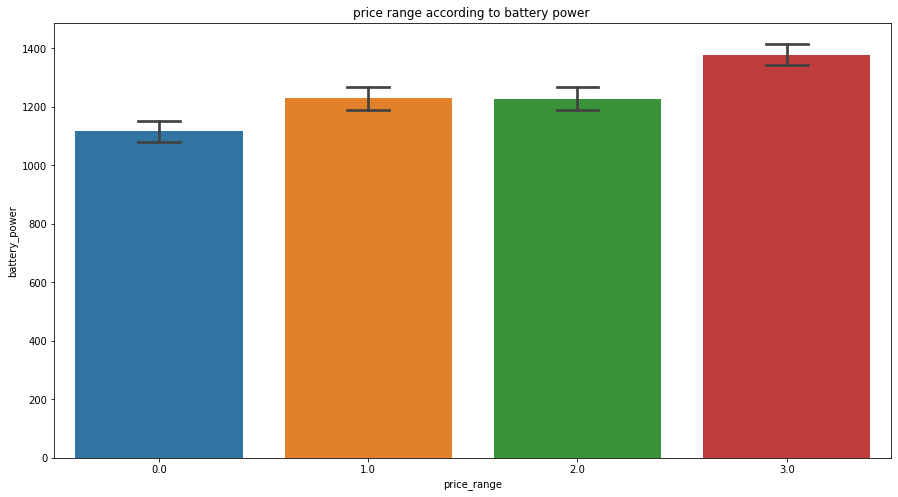

In [39]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(x=mobile_df['price_range'],y=mobile_df['battery_power'],ax=ax,capsize=.2)
ax.set(title='price range according to battery power ')
plt.show()

#In this barplot we can see that bigger the battery power higher the price range. which means price range is directly perpostional to battery power.

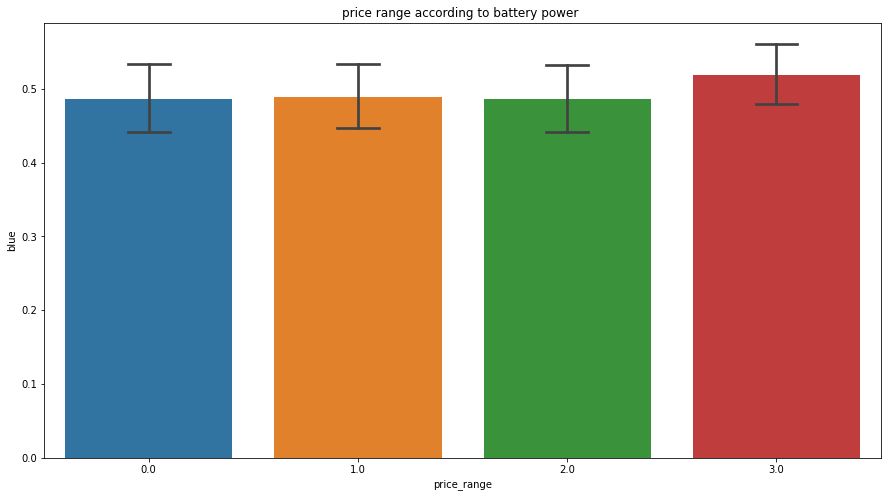

In [40]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(x=mobile_df['price_range'],y=mobile_df['blue'],ax=ax,capsize=.2)
ax.set(title='price range according to battery power ')
plt.show()